<a href="https://colab.research.google.com/github/ashishraj-hub/Image_Recognition_ML/blob/main/Image_Recognition_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

Image Recognization?
Deep Learning?
Dataset?
Preprocessing?
EDA(Exploratory Data Analysis)?

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ashishraj16","key":"557e8a00b9c830f5b238cdfa94f1392a"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [6]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape: {x_train.shape},Test Shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28),Test Shape: (10000, 28, 28)


In [7]:
x_train= x_train/255.0
x_test= x_test/255.0
x_train= x_train.reshape(-1,28,28,1)
x_test= x_test.reshape(-1,28,28,1)
print(f"Train reshaped: {x_train.shape}")

Train reshaped: (60000, 28, 28, 1)


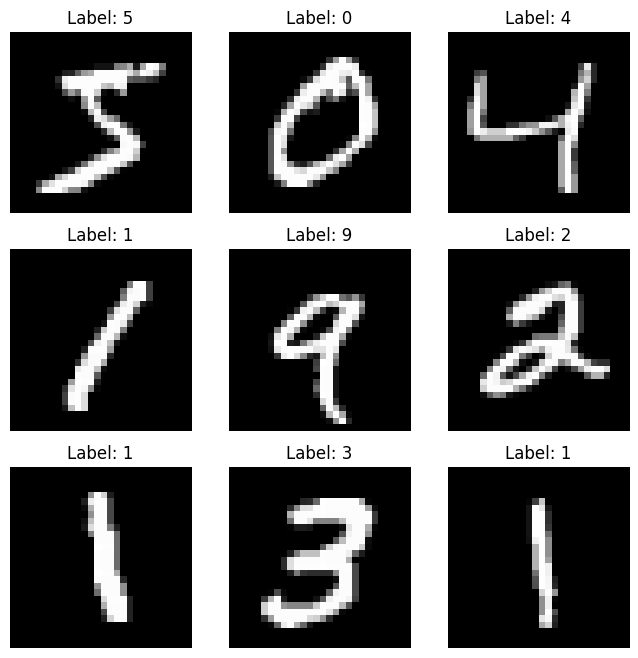

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i].reshape(28,28), cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

In [9]:
(x_train_c10, y_train_c10), (x_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
x_train_c10 = x_train_c10/255.0
x_test_c10 = x_test_c10/255.0
print(f"CIFAR-10 train shape: {x_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
CIFAR-10 train shape: (50000, 32, 32, 3)


# **Day 2**
What is Convolutional Neural Network(CNN)?
How does model training work?
Why do we use Dropout?
How to evaluate a model?

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model= Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3,),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history= model.fit(x_train, y_train, epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.8938 - loss: 0.3365 - val_accuracy: 0.9828 - val_loss: 0.0604
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9856 - loss: 0.0460 - val_accuracy: 0.9829 - val_loss: 0.0547
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9911 - loss: 0.0284 - val_accuracy: 0.9894 - val_loss: 0.0356
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9933 - loss: 0.0206 - val_accuracy: 0.9886 - val_loss: 0.0406
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 26ms/step - accuracy: 0.9960 - loss: 0.0126 - val_accuracy: 0.9904 - val_loss: 0.0374


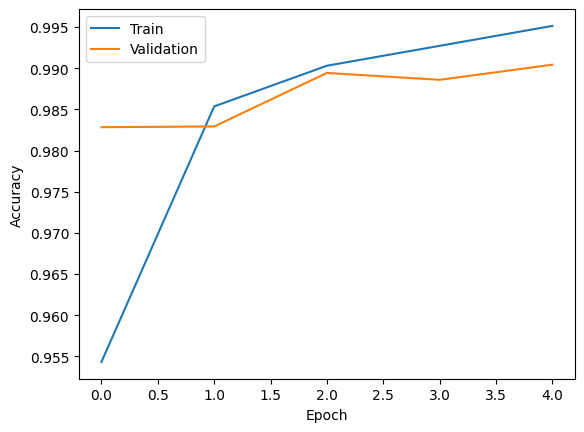

In [12]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
test_loss,test_acc=model.evaluate(x_test, y_test)
print('Test Accuracy:{test_acc:.4f}')
y_pred=model.predict(x_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9899 - loss: 0.0329
Test Accuracy:{test_acc:.4f}
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [14]:
from tensorflow.keras.layers import Dropout
model= Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3,),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer="adam",loss='sparse_categorical_crossentrophy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

# **Day 3**
Why Deeper CNNs?
What is Data Augmenttation?
What is Advance Evaluation Metrics?

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen= ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
    )
datagen.fit(x_train_c10)

In [16]:
from tensorflow.keras.layers import BatchNormalization
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3,),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3,),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(x_train_c10, y_train_c10, batch_size=32), epochs=10, validation_data=(x_test_c10, y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 70ms/step - accuracy: 0.3390 - loss: 1.7796 - val_accuracy: 0.4568 - val_loss: 1.5840
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 109s 70ms/step - accuracy: 0.5266 - loss: 1.3348 - val_accuracy: 0.6017 - val_loss: 1.1265
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 70ms/step - accuracy: 0.5767 - loss: 1.2021 - val_accuracy: 0.5816 - val_loss: 1.1710
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 70ms/step - accuracy: 0.6048 - loss: 1.1230 - val_accuracy: 0.6137 - val_loss: 1.1307
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 69ms/step - accuracy: 0.6265 - loss: 1.0711 - val_accuracy: 0.6290 - val_loss: 1.0969
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 112s 71ms/step - accuracy: 0.6411 - loss: 1.0340 - val_accuracy: 0.6475 - val_loss: 1.0414
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 71ms/step - accuracy: 0.6568 - loss: 0.9977 - val_accuracy: 0.6422 - val_loss: 1.0335
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 70ms/step - accuracy: 0.6602 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
              precision    recall  f1-score   support

           0       0.62      0.84      0.71      1000
           1       0.86      0.84      0.85      1000
           2       0.70      0.53      0.61      1000
           3       0.56      0.47      0.51      1000
           4       0.80      0.49      0.61      1000
           5       0.68      0.60      0.64      1000
           6       0.75      0.77      0.76      1000
           7       0.62      0.80      0.70      1000
           8       0.78      0.83      0.80      1000
           9       0.72      0.85      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



<function matplotlib.pyplot.show(close=None, block=None)>

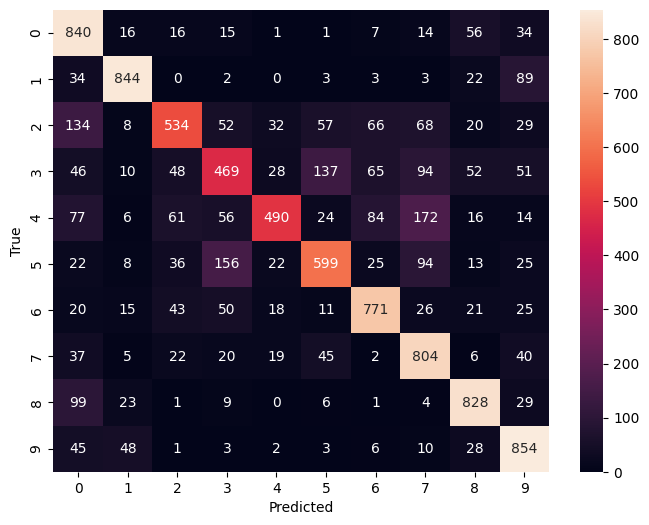

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred_c10=model.predict(x_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10, y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

In [18]:
print(x_test_c10.shape)

(10000, 32, 32, 3)


# **Day 4**
What are Pre-trained model?MobileNetV2, ResNet, VGG, ImageNet---
What is Transfer learning?---
How to Fine-Tune and Optimize?---
How to Deploy a Model?

In [19]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 81% 176M/218M [00:00<00:00, 662MB/s] 
100% 218M/218M [00:00<00:00, 655MB/s]


In [20]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r') as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen= ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator=datagen.flow_from_directory('/content/dogs-vs-cats',target_size=(224,224),
                                            batch_size=32,class_mode='binary',subset='training')
val_generator=datagen.flow_from_directory('/content/dogs-vs-cats',target_size=(224,224),
                                            batch_size=32,class_mode='binary',subset='training')

Found 8023 images belonging to 2 classes.
Found 8023 images belonging to 2 classes.


In [22]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model=MobileNetV2(weights='imagenet',include_top=False, input_shape=(224,224,3))
base_model.trainable=False

model=Sequential([base_model, GlobalAveragePooling2D(),Dense(128,activation='relu'),Dense(1,activation='sigmoid')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=5, validation_data=val_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 580s 2s/step - accuracy: 0.7935 - loss: 0.5440 - val_accuracy: 0.7982 - val_loss: 0.5052
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 574s 2s/step - accuracy: 0.7970 - loss: 0.4955 - val_accuracy: 0.7983 - val_loss: 0.4860
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 608s 2s/step - accuracy: 0.7994 - loss: 0.4820 - val_accuracy: 0.8018 - val_loss: 0.4615
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 610s 2s/step - accuracy: 0.7983 - loss: 0.4703 - val_accuracy: 0.8033 - val_loss: 0.4372
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 576s 2s/step - accuracy: 0.8090 - loss: 0.4405 - val_accuracy: 0.8073 - val_loss: 0.4160


In [23]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='binary_crossentropy', metrics=['accuracy']
              )
model.fit(train_generator, epochs=3, validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1769s 7s/step - accuracy: 0.8048 - loss: 0.4842 - val_accuracy: 0.8123 - val_loss: 0.3994
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1706s 7s/step - accuracy: 0.8066 - loss: 0.4439 - val_accuracy: 0.8178 - val_loss: 0.3913
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1709s 7s/step - accuracy: 0.8061 - loss: 0.4277 - val_accuracy: 0.8205 - val_loss: 0.3803


In [24]:
model.save('mobilenet_cats_dogs.h5')
# To load
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')

251/251 ━━━━━━━━━━━━━━━━━━━━ 315s 1s/step


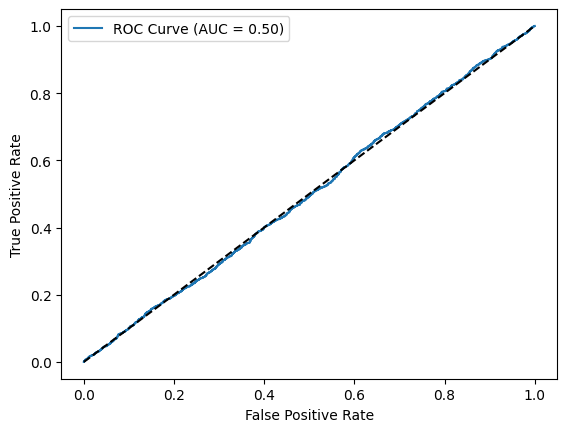

In [26]:
from sklearn.metrics import roc_curve,auc
y_pred_proba=loaded_model.predict(val_generator)
fpr,tpr,_=roc_curve(val_generator.classes,y_pred_proba)

roc_auc=auc(fpr,tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# **Day 5**
How to predict on New Data?
How to Create Portfolio Assets?
How to Present Results?

In [29]:
from google.colab import files
uploaded = files.upload() # Upload e.g. 'mycat.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path= 'download.jpg' # Replace wiith your filename
img= image.load_img(img_path, target_size=(224,224))
img_array=image.img_to_array(img)
img_array= np.expand_dims(img_array, axis=0)
img_array= preprocess_input(img_array)

prediction=loaded_model.predict(img_array)
print("Prediction class:", "Dog" if prediction[0][0] > 0.5 else "Cat")


Saving download (1).jpg to download (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Prediction class: Dog


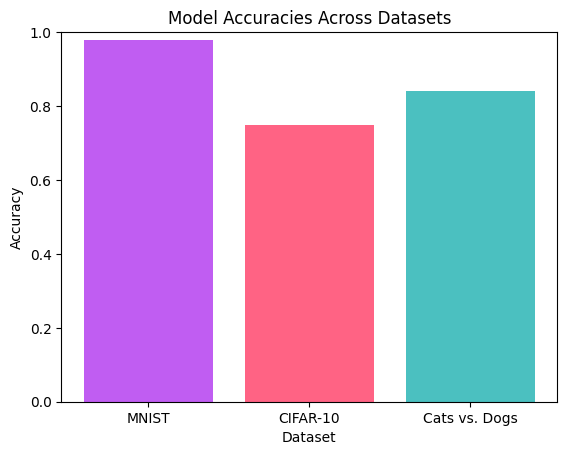

In [28]:
import matplotlib.pyplot as plt
datasets= ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies= [0.98, 0.75, 0.84]
plt.bar(datasets, accuracies, color= ['#A2EB','#FF6384','#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()